# Regressão Linear Simples

A **regressão linear simples** é uma técnica **estatística** fundamental utilizada para modelar a **relação** entre duas variáveis contínuas. O seu principal objetivo é encontrar a melhor linha reta que descreve como uma variável, denominada dependente (Y), se comporta em resposta às variações de outra variável, chamada de independente (X). Em essência, busca-se entender e quantificar a associação linear entre esses dois fatores.

A base da regressão linear simples é a equação de uma reta, que é expressa da seguinte forma:

$$Y = \beta_0 + \beta_1 X$$

Para determinar a linha que melhor representa a relação entre X e Y, a regressão linear simples utiliza o **método dos mínimos quadrados**. A ideia por trás deste método é **minimizar** a soma dos quadrados das distâncias verticais entre cada ponto de dado observado e a linha de regressão. Essas distâncias são chamadas de **resíduos**. Em outras palavras, o método busca a reta que comete os menores "erros" de previsão ao quadrado.

As fórmulas para calcular os coeficientes $\beta_1$ e $\beta_0$ que satisfazem essa condição são:

$$\beta_1 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2}$$
$$\beta_0 = \bar{y} - \beta_1 \bar{x}$$

Para avaliar a performance do modelo de regressão linear utilizaremos as seguintes métricas: $\text{MSE}$ (Mean Squared Error) e $R²$.

O $MSE$ calcula a média dos quadrados das diferenças entre os valores reais e os valores previstos pelo modelo.

$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

O $R²$ é uma medida de quão bem a linha de regressão se ajusta aos dados. Ele indica a proporção da variância na variável dependente (Y) que é explicável pela variável independente (X).

$$R^2 = 1 - \frac{\sum_{i=0}^{n} (y_i - \hat{y})^2}{\sum_{i=0}^{n} (y_i - \bar{y})^2}$$


### Importando as bibliotecas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Criando dados sintéticos 

In [140]:
X = 2 * np.random.randn(100, 1)
y = (1.5 * X + 3) + np.random.randn(100, 1)

### Vizualização dos dados sintéticos

Text(0.5, 0, 'Eixo x')

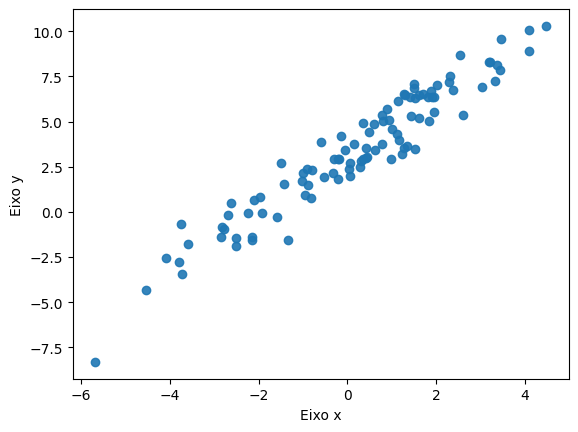

In [242]:
plt.scatter(X, y, alpha=0.9)
plt.ylabel('Eixo y')
plt.xlabel('Eixo x')

### Criação da regressão linear 

In [ ]:
class SimpleLinearRegression():
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        X = X.reshape((100, 1))
        y = y.reshape((100, 1))

        self.coef_ = self._coefficient_estimate(X, y)
        self.intercept_ = self._compute_intercept(X, y)

    def predict(self, X):
        x_times_coeff = np.multiply(X, self.coef_)
        return np.add(x_times_coeff, self.intercept_)

    def _coefficient_estimate(self, X, y):
        X_mean = np.average(X)
        y_mean = np.average(y)

        numerador = ((X - X_mean) * (y - y_mean)).sum()
        denominador = ((X - X_mean) ** 2).sum()

        return numerador / denominador

    def _compute_intercept(self, X, y):
        X_mean = np.average(X)
        y_mean = np.average(y)

        return y_mean - (self.coef_ * X_mean)

### Criação da predição usando o modelo

In [285]:
reg_lin = SimpleLinearRegression()

reg_lin.fit(X, y)

y_pred = reg_lin.predict(X)

### Vizualização da reta da regressão linear

Text(0.5, 1.0, 'Dados e Reta da Regressão Linear')

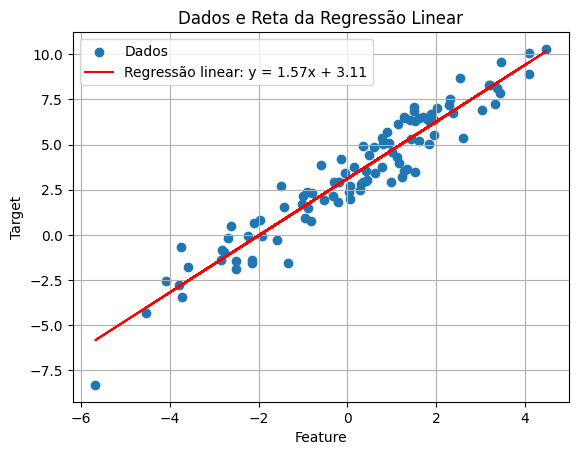

In [286]:
plt.scatter(X, y, label='Dados')
plt.plot(X, y_pred, color='red', label=f'Regressão linear: y = {reg_lin.coef_:.3}x + {reg_lin.intercept_:.3}')
plt.legend()
plt.grid(True)
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Dados e Reta da Regressão Linear')


### Aplicação as métricas de desempenho

In [257]:
mse = np.sum(((y - y_pred) ** 2)) / len(y_pred)
print(f'MSE: {mse}')

MSE: 0.982520817276773


In [258]:
r2 = 1 - (((y - y_pred) ** 2).sum() / ((y - np.average(y)) ** 2).sum())
print(f'R2: {r2}')

R2: 0.9170662202360003


### Comparativo entre a regressão feita do zero e a regressão da biblioteca scikit-learn

In [287]:
from sklearn.linear_model import LinearRegression

reg_lin_from_sklearn = LinearRegression()

reg_lin_from_sklearn.fit(X, y)

y_pred_from_sklearn = reg_lin_from_sklearn.predict(X)

### Vizualização das duas retas de regressão

Text(0.5, 1.0, 'Dados e Reta da Regressão Linear')

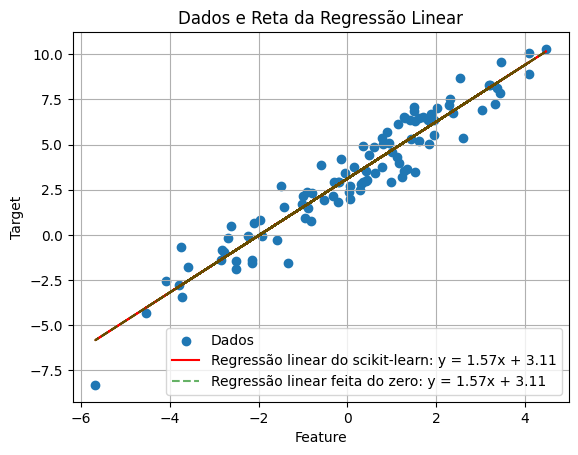

In [309]:
plt.scatter(X, y, label='Dados')
plt.plot(X, y_pred_from_sklearn, color='red', label=f'Regressão linear do scikit-learn: y = {reg_lin_from_sklearn.coef_[0][0]:.3}x + {reg_lin_from_sklearn.intercept_[0]:.3}')
plt.plot(X, y_pred, '--' ,color='green', label=f'Regressão linear feita do zero: y = {reg_lin.coef_:.3}x + {reg_lin.intercept_:.3}', alpha=0.6)
plt.legend()
plt.grid(True)
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Dados e Reta da Regressão Linear')

### Aplição das métricas usando a biblioteca scikit-learn

In [311]:
from sklearn.metrics import r2_score, mean_squared_error

print(f'R2: {r2_score(y, y_pred)}')
print(f'MSE: {mean_squared_error(y, y_pred)}')


R2: 0.9170662202360003
MSE: 0.982520817276773
